# Introductory applied machine learning (INFR10069) 

# Lab 3: Support Vector Machine (SVM) Classification and Evaluation

In this lab we initially re-examine the spam filtering problem from Lab 2. This time, we train a Logistic Regression model and a linear Support Vector Machine for the spam or non-spam classification task. In the second part of the lab we examine classification evaluation by using a K-nearest neighbour classifier.


All the datasets that you will need for this lab are located within the `datasets` directory (adjacent to this file).

In [2]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
KNeighboursClassifier = KNeighborsClassifier # For the Brits!
%matplotlib inline

/home/tiagopgle/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


## 1. Spam filtering

### ========== Question 1.1 ==========
Load `spambase_binary.csv` into a pandas DataFrame structure called `spambase`. Display the number of instances and attributes and the first 5 samples. Remember that the attributes have been binarised. The instances have also been shuffled (i.e. their order has been randomised). 

In [7]:
# Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'spambase_binary.csv')
spambase = pd.read_csv(data_path, delimiter = ',')
print("Data points: {}. Attributes: {}.".format(len(spambase), len(spambase.columns)))
spambase.head()

Data points: 4601. Attributes: 55.


,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


### ========== Question 1.2 ==========
We are going to use hold-out validation to evaluate our models below. Split the dataset into training and testing subsets using the `train_test_split` [function](http://scikit-learn.org/0.19/modules/generated/sklearn.cross_validation.train_test_split.html) we have used before. Call the resulting matrices `X_train`, `X_test`, `y_train`, `y_test`. Use 90% of the data for training and the remaining 10% for testing. Make sure you don't include the target variable `is_spam` in the input features (`X_train` / `X_test`)!

If you want to be able to reproduce your results exactly, what argument must you remember to set?

In [8]:
# Your Code goes here:
X = spambase.drop("is_spam", axis=1)
y = spambase["is_spam"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

***Your answer goes here:***
We must set `random_state` to 0, otherwise we would get a different split of data every time we ran `train_test_split`.

### ========== Question 1.3 ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier by using training data. Use the `lbfgs` solver and default settings for the other parameters. Report the classification accuracy on both the training and test sets. Does your classifier generalise well on unseen data?

In [9]:
# Your Code goes here:
lr = LogisticRegression(solver="lbfgs")
lr.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))

Accuracy on training set: 0.935
Accuracy on test set: 0.928


***Your answer goes here:***
Since the accuracy on the test set is close to the accuracy on the training set we can say the classifier generalises well.

### ========== Question 1.4 ==========
Print the coefficients for class 1 for the attributes `word_freq_hp_binarized` and `char_freq_$_binarized`. Generally, we would expect the string `$` to appear in spam, and the string `hp` to appear in non-spam e-mails, as the data was collected from HP Labs. Do the regression coefficients make sense given that class 1 is spam? *Hint: Consider the sigmoid function and how it transforms values into a probability between 0 and 1. Since our attributes are boolean, a positive coefficient can only increase the total sum fed through the sigmoid and thus move the output of the sigmoid towards 1. What can happen if we have continuous, real-valued attributes?*

In [18]:
# Your Code goes here:
print(lr.coef_[0, spambase.columns.get_loc("word_freq_hp_binarized")])
print(lr.coef_[0, spambase.columns.get_loc("char_freq_$_binarized")])

-2.6393472001873968
1.698642733252612


***Your answer goes here:***
Since `$` contributes to the spam class it makes sense that `char_freq_$_binarized` has a positive coefficient.
And because `hp` appears in non-spam e-mails it makes sense that `word_freq_hp_binarized` has a negative coefficient. 

### ========== Question 1.5 ==========
Train a [`LinearSVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (i.e. Linear Support Vector classifier) by using default parameters. Report the classification accuracy on the training and test sets. 

In [19]:
# Your Code goes here:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(lsvc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lsvc.score(X_test, y_test)))

Accuracy on training set: 0.935
Accuracy on test set: 0.920


### ========== Question 1.6 ==========
What are the coefficients for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`? Compare these to the ones you found with Logistic Regression.

In [20]:
# Your Code goes here:
print(lsvc.coef_[0, spambase.columns.get_loc("word_freq_hp_binarized")])
print(lsvc.coef_[0, spambase.columns.get_loc("char_freq_$_binarized")])

-0.8567716657149008
0.5693544430342181


***Your answer goes here:***
They are consistend with the ones found with Logistic Regression.

### ========== Question 1.7 ==========
How does a linear SVM relate to Logistic Regression? *Hint: Consider the classification boundary learnt in each model.*

***Your answer goes here:***
They both have linear classification boundaries. However, the classication method is different.
Logistic Regression applies a linear transformation to the input and the result is transformed to a probability by using a non-linear function.
SVM's classification is based on the similarity of a new data point to a few training instances know as support vectors.

### ========== Question 1.8 ==========
By using the [`SVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class train two new support vector classifiers with Gaussian (`rbf`) and polynomial (`poly`) kernels. Again, report classification accuracies on training and test sets and compare with your results from Question 1.5.

In [25]:
# Your Code goes here:
svc_rbf = SVC(kernel="rbf")
svc_rbf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svc_rbf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc_rbf.score(X_test, y_test)))

svc_poly = SVC(kernel="poly", degree=2)
svc_poly.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svc_poly.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc_poly.score(X_test, y_test)))

Accuracy on training set: 0.934
Accuracy on test set: 0.931
Accuracy on training set: 0.873
Accuracy on test set: 0.874


***Your answer goes here:*** SVC with rbf kernel has the best performance so far.

# 2. Performance assessment
We will now look at a few ways of assessing the performance of a classifier. To do so we will introduce a new data set, the [Splice](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) data set. The classification task is to identify `intron` and `exon` boundaries on gene sequences. For more information, you can read the dataset description in the link. The class attribute can take on 3 values: `N`, `IE` and `EI`.

### ========== Question 2.1 ==========
Load the `splice_train.csv` and `splice_test.csv` into two separate dataframes. Display the shape and first 10 instances for each dataframe.

In [76]:
# Load Splice Train Here

# Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'splice_train.csv')
splice_train = pd.read_csv(data_path, delimiter = ',')
print("Data points: {}. Attributes: {}.".format(len(splice_train), len(spambase.columns)))
splice_train.head()

Data points: 2935. Attributes: 55.


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,T,G,A,T,G,C,C,T,G,C,...,C,C,C,C,C,T,G,A,G,N
1,G,C,C,C,A,T,A,T,T,C,...,T,G,G,A,C,T,T,C,C,N
2,G,G,C,T,G,C,C,G,G,A,...,A,C,T,G,T,G,T,C,T,EI
3,C,T,G,C,T,G,C,T,G,G,...,G,G,C,T,G,C,T,G,G,EI
4,T,C,C,C,C,G,A,G,C,C,...,A,T,C,A,G,C,G,C,A,N


In [77]:
# Load Splice Test Here

# Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'splice_test.csv')
splice_test = pd.read_csv(data_path, delimiter = ',')
print("Data points: {}. Attributes: {}.".format(len(splice_test), len(splice_test.columns)))
splice_test.head()

Data points: 255. Attributes: 61.


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,C,C,C,T,C,C,C,A,C,T,...,C,C,C,A,G,T,G,C,A,IE
1,C,A,C,T,G,A,G,T,T,G,...,G,A,A,C,C,A,G,T,G,N
2,C,A,G,A,C,T,G,G,G,T,...,A,G,A,C,C,A,C,A,G,EI
3,A,G,T,G,A,T,T,G,A,C,...,T,A,C,C,A,A,A,G,A,N
4,G,T,A,G,A,C,A,C,C,T,...,A,T,C,C,C,T,T,C,T,IE


### ========== Question 2.2 ========== 
Convert the categorical attributes into numeric ones by using the [`get_dummies(...)`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.get_dummies.html) function from pandas. Make sure to take care of the values `D`, `N`, `S`, `R` (see the [documentation](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) for the data). *Hint: checkout the pandas [`CategoricalDtype`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html#pandas.api.types.CategoricalDtype)*. Also, make sure to not transform the target variable (`class`).

In [78]:
# Your Code goes here:
ctype = CategoricalDtype(['A', 'G', 'T', 'C', 'D', 'N', 'R', 'S'])
splice_train_1hot = pd.get_dummies(splice_train.drop("class", axis=1).astype(ctype))
splice_test_1hot = pd.get_dummies(splice_test.drop("class", axis=1).astype(ctype))

### ========== Question 2.3 ==========
Store the training and testing data into numpy arrays `X_train`, `y_train`, `X_test` and `y_test`. Display the shapes of the four arrays.

In [106]:
# Your Code goes here:
X_train = splice_train_1hot.values
X_test = splice_test_1hot.values
y_train = splice_train["class"]
y_test = splice_test["class"]
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))
print(splice_train.drop("class", axis=1).shape)
print(splice_train.drop("class", axis=1).astype(ctype).shape)

X_train shape: (2935, 480)
y_train shape: (2935,)
X_test shape: (255, 480)
y_test shape: (255,)
(2935, 60)
(2935, 60)


### ========== Question 2.4 ==========
Familiarise yourself with [Nearest Neighbours Classification](http://scikit-learn.org/0.19/modules/neighbors.html#classification). Use a [`KNeighborsClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
by using a single neighbour. Report the classification accuracy on the training set.

In [80]:
# Your Code goes here:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))

Accuracy on training set: 1.000


### ========== Question 2.5 ==========
Is the above result meaningful? Why is testing on the training data a particularly bad idea for a 1-nearest neighbour classifier? Do you expect the performance of the classifier on a test set to be as good?

***Your answer goes here:*** The above result is not meaningful. The 1-nearest neighbour classifier will classify each instace to the class of the nearest insance in the training set. If we test the classifier on the training set, then each input will be classified correctly since the closest instance in the training set is the instance itself. The performance on unseen data is expected to be much lower.

### ========== Question 2.6 ==========
Now report the classification accuracy on the test set and check your expectations.

In [81]:
# Your Code goes here:
print("Accuracy on training set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.745


### ========== Question 2.7 ==========
Plot a histogram of the target variable (i.e. `class`) in the test set. *Hint: matplotlib won't allow you to plot a histogram for categorical values. Instead, you can use Pandas' built-in bar plot tool in conjunction with the [`value_counts`](http://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.value_counts.html).* 

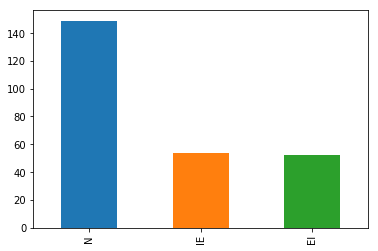

In [82]:
# Your Code goes here:
class_counts = splice_test["class"].value_counts()
class_counts.plot(kind="bar")

### ========== Question 2.8 ==========
What would be the accuracy of the classifier, if all points were labelled as `N`? 

**Pro Tip** - You should always use a ['Dummy Model'](http://scikit-learn.org/0.19/modules/model_evaluation.html#dummy-estimators) (a ridiculously simple model) like this to compare with your 'real' models. It's very common for complex models to be outperformed by a simple model, such as predicting the most common class. When complex models are outperformed by 'Dummies', you should investigate why: often there was an issue with the code, the data, or the way the model works was misunderstood.

In [83]:
# Your Code goes here:
print('Accuracy of always predicting N: {:.3f}'.format(class_counts["N"] / class_counts.values.sum()))

Accuracy of always predicting N: 0.584


### ========== Question 2.9 ==========
Now we want to explore the effect of the `k` parameter. To do this, train the classifier multiple times, each time setting the KNN option to a different value. Try `5`, `10`, `50`, `100`, `200`, `500`, `1000`, `1500` and `2000` and test the classifier on the test set. How does the k parameter effect the results? *Hint: Consider how well the classifier is generalising to previously unseen data, and how it compares to the dumb prediction accuracy.*

In [87]:
# Your Code goes here:
ks = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]
scores = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)
    print("Accuracy on test set with {} nearest neighbors: {:.3f}".format(k, score))

Accuracy on test set with 5 nearest neighbors: 0.773
Accuracy on test set with 10 nearest neighbors: 0.812
Accuracy on test set with 50 nearest neighbors: 0.867
Accuracy on test set with 100 nearest neighbors: 0.886
Accuracy on test set with 200 nearest neighbors: 0.906
Accuracy on test set with 500 nearest neighbors: 0.949
Accuracy on test set with 1000 nearest neighbors: 0.965
Accuracy on test set with 1500 nearest neighbors: 0.698
Accuracy on test set with 2000 nearest neighbors: 0.584


***Your answer goes here:***

### ========== Question 2.10 ==========
Plot the results (k-value on the x-axis and classification accuracy on the y-axis), making sure to mark the axes. Can you conclude anything from observing the plot?

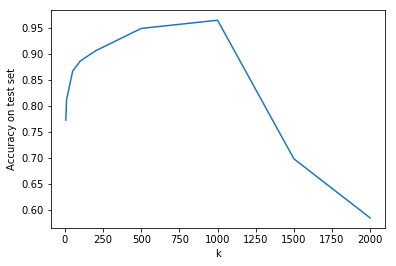

In [90]:
# Your Code goes here:
#plt.scatter(ks, scores)
plt.plot(ks,scores)
plt.xlabel('k')
plt.ylabel('Accuracy on test set')
plt.show()

***Your answer goes here:***

### ========== Question 2.11 ==========
Select best value for `k` from Questions 2.9 and 2.10 and plot the normalised confusion matrix on the test set (you may use the provided function). Then plot the confusion matrix for a 5-nearest neighbour classifier. What do you observe?

In [92]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')

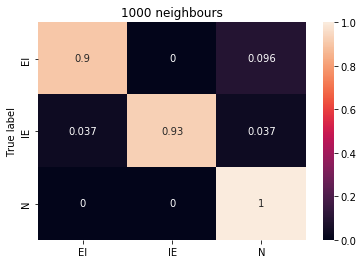

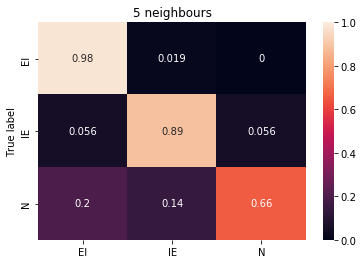

In [93]:
# Your Code goes here:
for i in [1000, 5]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    cm = confusion_matrix(y_test, knn.predict(X_test))
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=knn.classes_, title = str(i) + ' neighbours')

***Your answer goes here:***

### ========== Question 2.12 ==========
Read about the [logarithimic loss](http://scikit-learn.org/0.19/modules/generated/sklearn.metrics.log_loss.html) (or cross-entropy loss). It is often the error metric used when we are trying to optimise classification models.

This metric takes as input the true labels and the estimated probability distributions (bernouli or multinomial). It makes sense to use this metric when we are interested not only in the predicted labels, but also in the confidence with which these labels are predicted.

For instance, think of the situation where you have a single test point and two classifiers. Both classifiers predict the label correctly, however classifier A predicts that the test point belongs to the class with probability 0.55, whereas classifier B predicts the correct class with probability 0.99. Classification accuracy would be the same for the two classifiers (why?) but the `log_loss` metric would indicate that classifier B should be favoured.

Produce a scatter plot similar to the one in Question 2.10 but this time show `log_loss` on your y axis. Which value for `k` would you pick if `log_loss` was the error metric? Comment on why this might happen, and which metric would be a better evaluator of performance.

Performance on test with  5  nearest neighbours:  1.098749665258065
Performance on test with  10  nearest neighbours:  0.48269823951654434
Performance on test with  50  nearest neighbours:  0.5295699221124731
Performance on test with  100  nearest neighbours:  0.5575541329984139
Performance on test with  200  nearest neighbours:  0.6010940389068344
Performance on test with  500  nearest neighbours:  0.670927600876827
Performance on test with  1000  nearest neighbours:  0.754663389026571
Performance on test with  1500  nearest neighbours:  0.8177287055931994
Performance on test with  2000  nearest neighbours:  0.8753647883393483


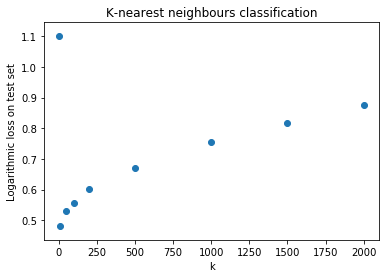

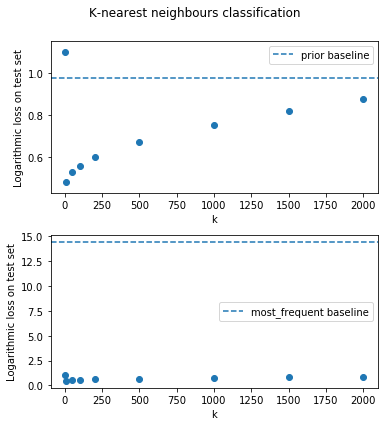

In [94]:
# Your Code goes here:
k_list = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]
logloss = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    pred_proba = knn.predict_proba(X_test)
    this_logloss = log_loss(y_test, pred_proba)
    logloss.append(this_logloss)
    print('Performance on test with ', k, ' nearest neighbours: ', this_logloss)
plt.scatter(k_list, logloss)
plt.xlabel('k')
plt.ylabel('Logarithmic loss on test set')
plt.title('K-nearest neighbours classification')

# Extension - plot baselines too
baselines = ['prior', 'most_frequent']
fig, ax = plt.subplots(len(baselines), 1, figsize=(5.5,6))
from sklearn.dummy import DummyClassifier
bl_loss = {}
for ii, baseline in enumerate(baselines):
    plt.sca(ax[ii])
    dummy_classifier = DummyClassifier(strategy=baseline).fit(X_train, y_train)
    pred_proba = dummy_classifier.predict_proba(X_test)
    this_logloss = log_loss(y_test, pred_proba)
    plt.scatter(k_list, logloss)
    plt.axhline(this_logloss, label='{} baseline'.format(baseline), linestyle='--')
    plt.xlabel('k')
    plt.ylabel('Logarithmic loss on test set')
    plt.legend()

plt.suptitle('K-nearest neighbours classification')
plt.tight_layout()
plt.subplots_adjust(top=.9)
plt.show()

***Your answer goes here:***

### ========== Question 2.13 ==========

Could you use the `log_loss` metric to evaluate the performance of an SVM classifier? Explain.

***Your answer goes here:***